<a href="https://colab.research.google.com/github/sagargahalod/Misc/blob/master/Copy_of_Fieldwork_RootCause_Team_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 print("Mounting your Google Drive ...")
 
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive',force_remount=True)
 
path = "/content/drive/My Drive/Rootcause/"

Mounting your Google Drive ...
Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [2]:
#library imports
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('max_columns', 140)

In [3]:
# Creating a dataframe from the defect file
defect = pd.read_csv(path+"RC_DEFECTS_clean.csv",engine='python',sep='\s+|,|\t')
defect.head()

,COIL,MT_FROM,MT_TO,DATE,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6
0,"""389523",0.0,599.0,"""""2019-03-01""""","""""0""""","""""0""""","""""1""""","""""0""""","""""0""""","""""0"""""""
1,"""389523",600.0,1457.0,"""""2019-03-01""""","""""0""""","""""1""""","""""1""""","""""0""""","""""0""""","""""0"""""""
2,"""389528",0.0,1399.0,"""""2019-03-01""""","""""0""""","""""0""""","""""1""""","""""0""""","""""0""""","""""0"""""""
3,"""389528",1400.0,1539.0,"""""2019-03-01""""","""""0""""","""""0""""","""""1""""","""""0""""","""""1""""","""""0"""""""
4,"""389712",0.0,1374.0,"""""2019-03-01""""","""""0""""","""""0""""","""""1""""","""""0""""","""""0""""","""""0"""""""


In [ ]:
defect.isnull().sum().sum()

0

In [4]:
defect = defect.replace(r'["]', '', regex=True)

In [5]:
pd.set_option("display.max_rows", 101)

In [ ]:
#pd.set_option('max_rows',100)
defect.head(100)

In [6]:
defect['COIL'] = defect['COIL'].astype('int64')

In [7]:
defect.sort_values(by=['COIL','MT_FROM','MT_TO'],inplace=True)

In [ ]:
defect.groupby(['COIL','MT_FROM','MT_TO'],sort=False)[['DIF_TIPO_1','DIF_TIPO_2','DIF_TIPO_3','DIF_TIPO_4','DIF_TIPO_5','DIF_TIPO_6']].sum()

,,,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6
COIL,MT_FROM,MT_TO,,,,,,
367736,0.0,719.0,0,0,1,0,0,0
381326,2.0,2123.0,1,0,1,1,0,0
382125,7.0,2230.0,0,0,0,1,0,0
383325,0.0,820.0,0,0,1,0,0,0
384413,800.0,2118.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
425612,0.0,2055.0,0,0,1,1,0,0
426151,0.0,1374.0,0,0,1,0,0,0
426152,0.0,2518.0,0,0,1,0,0,1


In [ ]:
defect.groupby(['COIL'],sort=True)[['MT_FROM','MT_TO']].sum().sort_index()

,MT_FROM,MT_TO
COIL,,
367736,0.0,719.0
381326,2.0,2123.0
382125,7.0,2230.0
383325,0.0,820.0
384413,800.0,2118.0
...,...,...
425612,0.0,2055.0
426151,0.0,1374.0
426152,0.0,2518.0


In [ ]:
defect.isnull().sum().sum()

0

In [8]:
# Creating a dataframe from the given file
df = pd.read_csv(path+"RC_PRODUCTION_clean.csv",engine='python',sep='\s+|,|\t')
df.head()

,COIL,DATE,MT,TIME_START_PROCESS,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,TEMP_Z6,PYRO_1_PRECHMBR,PYRO_2_FRST_3_ZONE,PYRO_3_LST_3_ZONE,LS_OVEN,LASER_FRN_1,LASER_FRN_2,LASER_FRN_3,LASER_FRN_4,LASER_FRN_5,LASER_FRN_6,LASER_FRN_7,LASER_FRN_8,LASER_FRN_9,AIR_CH4_1,AIR_CH4_2,AIR_CH4_3,AIR_CH4_4,AIR_CH4_5,AIR_CH4_6,AIR_Z1_1,AIR_Z1_2,AIR_Z2_1,AIR_Z2_2,AIR_Z3_1,AIR_Z3_2,AIR_Z4_1,AIR_Z4_2,AIR_Z5_1,AIR_Z5_2,AIR_Z6_1,AIR_Z6_2,GAS_Z1_1,GAS_Z1_2,GAS_Z2_1,GAS_Z2_2,GAS_Z3_1,GAS_Z3_2,GAS_Z4_1,GAS_Z4_2,GAS_Z5_1,GAS_Z5_2,GAS_Z6_1,GAS_Z6_2,FRN_PHF_PRESSURE,FRN_FURNACE_PRESSURE,TIRO_FORNO,PRES_ZONA1_MEASURED,PRES_ZONA1_SET,PRES_ZONA2_MEASURED,PRES_ZONA2_SET,PRES_ZONA3_MEASURED,PRES_ZONA3_SET,EXT_1,EXT_2,VENT_1,VENT_2,VENT_3,VENT_4,VENT_5,COOL_1A,COOL_1B,COOL_2A,COOL_2B,COOL_3,LS_COOLING,LASER_RAFF_1,LASER_RAFF_2,LASER_RAFF_3,LASER_RAFF_4,LASER_RAFF_5,LASER_RAFF_6,LASER_RAFF_7,LASER_RAFF_8,LASER_RAFF_9,TOUT_RAFF_H2O,N_RAMPE_H2O,ELET_TEMP,ELET_H2SO4,ELET_FE2,ELET_CORRENTE,DEC_TEMP,DEC_H2SO4,DEC_HF,DEC_FE2,DEC_FE3,DEC_FETOT,SPZ2_R1,SPZ2_R2,SPZ2_R3,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG
0,"""240627",2019-03-15,0.0,"""""14:25:23.060""""",16.934625,671.967562,679.751438,688.119187,716.717250,734.616563,734.603062,549.3825,667.890562,548.112375,680.363437,675.189562,677.733187,678.710812,680.512500,681.296625,681.257250,680.042250,677.425500,675.167063,5.412954,-2.463474,-197.742938,0.271786,-0.082831,3.195928,35.145338,295.377750,-59.750888,-33.014306,42.801750,172.177312,33.087825,30.396881,-3.469629,0.231439,26.941669,-0.011718,3.358429,3.852309,6.945739,-2.496392,-6.280712,6.114578,4.744254,22.834238,2.959881,1.654808,-1.963131,2.959054,-0.155080,0.265811,711.841500,-2.387571,-3.375,-3.326377,-3.375,-2.095622,-3.375,18.897244,29.771494,12.374775,12.374156,12.374325,20.5029,12.374325,466.040250,296.154000,183.563438,110.944688,74.410819,94.668638,27.482963,28.003106,30.131606,94.425413,94.524019,95.056537,79.568213,79.544250,31.477163,46.166963,12.49875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""""""""","""""""""","""""""""","""""""""","""""""""",""""""""""""
1,"""240627",2019-03-15,7.0,"""""14:25:53.060""""",16.773638,668.635875,676.207125,681.034500,710.093250,729.040500,727.025625,549.3825,668.464875,548.112375,685.389375,675.187875,680.254875,681.987375,685.770750,687.187125,687.065625,684.934875,679.737375,675.140625,5.702468,-2.587680,-179.533125,0.279100,-0.050294,3.584981,36.641813,295.934625,-59.764950,-35.279438,42.413287,171.421875,33.298875,31.581900,-2.599538,0.641584,27.956250,1.499962,3.202796,3.683002,6.860655,-2.523127,-6.280830,6.225907,4.629274,22.819950,2.955735,1.641015,-1.969537,2.940705,-0.256311,0.083956,489.591000,-2.506792,-3.375,-4.835430,-3.375,-2.201186,-3.375,19.434487,28.253812,12.373875,12.374550,12.374663,20.5029,12.375337,470.616750,299.374875,186.270750,102.729712,57.856837,66.875287,26.618963,27.168750,29.046038,66.229537,66.171037,68.225288,27.687038,25.408462,28.310962,46.166963,12.49875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""""""""","""""""""","""""""""","""""""""","""""""""",""""""""""""
2,"""240627",2019-03-15,14.0,"""""14:26:23.060""""",11.142165,669.105375,677.042625,678.493125,707.967750,727.783500,724.035750,549.3825,667.828500,548.112375,686.797875,675.192375,681.437625,683.927250,687.002625,688.842750,688.174500,686.041500,681.386625,675.134625,5.890249,-2.584238,75.733500,0.273436,-0.001853,3.798979,37.464562,296.771625,-59.747062,-38.886825,42.035400,171.511125,32.032162,31.558612,-1.750928,1.677368,29.319825,2.925375,3.138184,3.562155,6.958714,-2.452084,-6.279859,6.276765,4.634884,22.818113,2.941320,1.672804,-1.971109,2.976086,-0.226870,0.076216,496.532625,-2.835619,-3.375,-3.343840,-3.375,-2.112874,-3.375,19.367747,29.082291,12.374016,12.374016,12.374494,20.5029,12.374663,488.363063,308.761594,190.889156,108.016931,57.902175,66.992681,26.639663,27.178

Brief description about the data:
1. There are 110 features 
2. Merging required for the two files to establish relationship between defects and the other parameter settings introduced them
3. The data is for the period of 2~2.5 months

In [10]:
#It can be noticed that many variables have a Special character associated with the actual value and needs to be removed
# To reduce the processing time need to identify the unessessary columns and drop them (including NAN ),basically we have to do the feature extraction/selection before data cleaning

df.isnull().sum().sum()
#df[df['COIL'].isnull()]

738019

In [9]:
df.shape

(299384, 110)

In [11]:
# This variable is not usefull for analysis and can be dropped straightaway

df.drop('TIME_START_PROCESS',inplace=True,axis=1)


In [ ]:
for i in df.columns:
  print(df[i].dtype)

**Except COIL which is INT64 and Date which is Object type ,all other variables are of Float type**



In [12]:
# If something goes wrong with the prod file run from this step to revert to the previous stage
dfprod = df.copy()
#dfprod.tail()


In [13]:
dfprod = dfprod.replace(r'["]', '', regex=True)

In [14]:
dfprod['COIL'] = dfprod['COIL'].astype('int64')

In [ ]:
#dfprod = dfprod.replace(r'^\s*$', np.NaN, regex=True).replace(r'["]', '', regex=True)
#dfprod = dfprod.replace(r'^\s*$', np.nan, regex=True)


In [15]:
dfprod_bck = dfprod.copy()

In [16]:
print(dfprod.shape)
dfprod.drop_duplicates(['COIL','MT'],inplace=True)
print(dfprod.shape)

(299384, 109)
(285498, 109)


In [ ]:
dfprod.isnull().sum().sort_values(ascending=False).nlargest(50)

In [18]:
dfprod.sort_values(by=['COIL','MT'],inplace=True)

In [ ]:
pd.set_option('max_rows',146)

In [ ]:
dfprod[dfprod['COIL']==390826]

In [19]:
final = pd.merge(dfprod,defect, on=['COIL'],how='inner', suffixes=['_prod', '_defect'],sort=True)
print(final.shape)
print(final.COIL.unique().shape)
final.tail(100)

(126917, 118)
(534,)


,COIL,DATE_prod,MT,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,TEMP_Z6,PYRO_1_PRECHMBR,PYRO_2_FRST_3_ZONE,PYRO_3_LST_3_ZONE,LS_OVEN,LASER_FRN_1,LASER_FRN_2,LASER_FRN_3,LASER_FRN_4,LASER_FRN_5,LASER_FRN_6,LASER_FRN_7,LASER_FRN_8,LASER_FRN_9,AIR_CH4_1,AIR_CH4_2,AIR_CH4_3,AIR_CH4_4,AIR_CH4_5,AIR_CH4_6,AIR_Z1_1,AIR_Z1_2,AIR_Z2_1,AIR_Z2_2,AIR_Z3_1,AIR_Z3_2,AIR_Z4_1,AIR_Z4_2,AIR_Z5_1,AIR_Z5_2,AIR_Z6_1,AIR_Z6_2,GAS_Z1_1,GAS_Z1_2,GAS_Z2_1,GAS_Z2_2,GAS_Z3_1,GAS_Z3_2,GAS_Z4_1,GAS_Z4_2,GAS_Z5_1,GAS_Z5_2,GAS_Z6_1,GAS_Z6_2,FRN_PHF_PRESSURE,FRN_FURNACE_PRESSURE,TIRO_FORNO,PRES_ZONA1_MEASURED,PRES_ZONA1_SET,PRES_ZONA2_MEASURED,PRES_ZONA2_SET,PRES_ZONA3_MEASURED,PRES_ZONA3_SET,EXT_1,EXT_2,VENT_1,VENT_2,VENT_3,VENT_4,VENT_5,COOL_1A,COOL_1B,COOL_2A,COOL_2B,COOL_3,LS_COOLING,LASER_RAFF_1,LASER_RAFF_2,LASER_RAFF_3,LASER_RAFF_4,LASER_RAFF_5,LASER_RAFF_6,LASER_RAFF_7,LASER_RAFF_8,LASER_RAFF_9,TOUT_RAFF_H2O,N_RAMPE_H2O,ELET_TEMP,ELET_H2SO4,ELET_FE2,ELET_CORRENTE,DEC_TEMP,DEC_H2SO4,DEC_HF,DEC_FE2,DEC_FE3,DEC_FETOT,SPZ2_R1,SPZ2_R2,SPZ2_R3,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG,MT_FROM,MT_TO,DATE_defect,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6
126817,426213,2019-05-15,1008.0,41.551538,1303.203750,1327.665000,1286.130000,1338.465000,1339.248750,1326.348750,823.708500,1011.159375,1132.016250,1280.265000,728.332875,991.781250,1226.910000,1290.821250,1294.338750,1295.396250,1293.858750,1290.787500,857.379375,1.286048,1.414054,1.583722,1.286239,1.293109,1.267627,1255.181250,1479.701250,3716.381250,3944.073750,4088.651250,4180.631250,1886.711250,2002.995000,1124.555250,1149.393750,1291.552500,1315.593750,126.267750,124.788000,321.121125,318.392250,308.182875,308.197500,178.728750,178.267500,103.910438,103.685737,121.587000,121.233000,-11.101144,1.294714,1710.825000,-3.122235,-3.375,-2.108891,-3.375,-2.652131,-3.375,25.348613,51.167925,19.123875,19.124325,23.246437,47.551275,43.690163,1013.442750,843.766875,731.800125,623.166750,453.948750,281.250000,68.839538,60.956213,73.029038,281.250000,281.250000,281.250000,281.197125,281.250000,250.767000,46.163475,12.49875,56.694488,114.975,15.0750,2729.345625,69.141544,121.837500,39.37500,19.80000,45.33750,65.1375,561.974063,530.168625,530.189437,530.867813,20.232000,19.999463,3550.477500,40.894950,968.599875,3485.733750,0.539768,0.135006,0.162020,0.0,1408.0,2019-05-15,0,0,1,0,0,1
126818,426213,2019-05-15,1015.0,41.548888,1303.126250,1327.661250,1286.093750,1338.321250,1338.860000,1326.011250,823.155500,1011.395625,1132.090000,1280.558750,728.013500,992.201875,1226.986250,1291.332500,1294.561250,1295.642500,1294.267500,1290.883750,857.647875,1.288436,1.412463,1.580591,1.284884,1.297091,1.270211,1260.261250,1480.050000,3711.527500,3950.203750,4085.147500,4177.458750,1893.508750,2010.751250,1129.061250,1152.956250,1307.086250,1331.275000,126.255250,124.839875,321.577500,318.772500,308.539375,308.567500,179.652375,179.056000,103.956437,103.745475,122.785500,122.427000,-11.088243,1.283841,1710.015000,-3.152134,-3.375,-2.480364,-3.375,-2.705585,-3.375,25.411000,51.059950,19.124837,19.124675,23.248100,47.528350,43.687362,1013.407750,843.713500,731.837750,623.348750,452.830500,281.250000,73.967563,60.928825,73.009175,281.250000,281.250000,281.250000,281.238250,281.250000,234.718625,46.163475,12.49875,56.698287,114.975,15.0750,2748.118750,69.140675,121.837500,39.37500,19.80000,45.33750,65.1375,561.948500,530.152500,530.581375,530.970500,20.227862,19.936138,3550.458750,40.885612,977.108125,3470.177500,0.538860,0.134990,0.161983,0.0,1408.0,2019-05-15,0,0,1,0,0,1
126819,426213,2019-05-15,1022.0,41.548825,1303.148750,1327.745000,1286.223750,1338.251250,1338.542500,1325.857500,823.082750,1011.864000,1132.395000,1281.097500,727.749000,992.427875,1227.641250,1291.975000,1294.905000,1296.088750,1294.857500,1291.113750,857.931875,1.289781,1.408371,1.575521,1.279749,1.288515,1.273300,1263.346250,1479.111250,3698.298750,3949

In [ ]:
final.isnull().sum().nlargest(50)

In [ ]:
val_col = final.columns

In [20]:
defect_y = final.loc[(final['MT']<=final['MT_TO']) & (final['MT']>=final['MT_FROM'])]
defect_n= final.loc[~((final['MT']<=final['MT_TO']) & (final['MT']>=final['MT_FROM']))]

In [21]:
defect_y_bck = defect_y.copy()
defect_n_bck = defect_n.copy()

In [25]:
col_list =['SPEED_FILL','FILL_FORZA','FILL_TIRO','FILL_ALL','FILL_BENDING_POS','FILL_BENDING_NEG']
for col in col_list:
  defect_y[col] = pd.to_numeric(defect_y[col])
  defect_n[col] = pd.to_numeric(defect_n[col])

  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
float_cols1 = defect_y.select_dtypes(include=['float'])
float_cols2 = defect_n.select_dtypes(include=['float'])
for i in float_cols1:
  defect_y[i]= defect_y[i].fillna(dfprod.groupby('COIL')[i].transform('mean'))
for i in float_cols2:
  defect_n[i]= defect_n[i].fillna(dfprod.groupby('COIL')[i].transform('mean'))

In [ ]:
defect_y.MT_TO.fillna(max(defect_y.MT), inplace=True)
defect_y.MT_FROM.fillna('0.0', inplace=True)
defect_y.DATE_defect.fillna(final.DATE_prod, inplace=True)
defect_y.isnull().sum().sort_values(ascending=False)

In [ ]:
defect_n.MT_TO.fillna(max(defect_n.MT), inplace=True)
defect_n.MT_FROM.fillna('0.0', inplace=True)
defect_n.DATE_defect.fillna(final.DATE_prod, inplace=True)
defect_n.isnull().sum().sort_values(ascending=False)

In [ ]:
float_cols = final.select_dtypes(include=['float'])
for i in float_cols:
  dfprod[i]= dfprod[i].fillna(dfprod.groupby('COIL')[i].transform('mean'))

,COIL,DATE_prod,MT,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,TEMP_Z6,PYRO_1_PRECHMBR,PYRO_2_FRST_3_ZONE,PYRO_3_LST_3_ZONE,LS_OVEN,LASER_FRN_1,LASER_FRN_2,LASER_FRN_3,LASER_FRN_4,LASER_FRN_5,LASER_FRN_6,LASER_FRN_7,LASER_FRN_8,LASER_FRN_9,AIR_CH4_1,AIR_CH4_2,AIR_CH4_3,AIR_CH4_4,AIR_CH4_5,AIR_CH4_6,AIR_Z1_1,AIR_Z1_2,AIR_Z2_1,AIR_Z2_2,AIR_Z3_1,AIR_Z3_2,AIR_Z4_1,AIR_Z4_2,AIR_Z5_1,AIR_Z5_2,AIR_Z6_1,AIR_Z6_2,GAS_Z1_1,GAS_Z1_2,GAS_Z2_1,GAS_Z2_2,GAS_Z3_1,GAS_Z3_2,GAS_Z4_1,GAS_Z4_2,GAS_Z5_1,GAS_Z5_2,GAS_Z6_1,GAS_Z6_2,FRN_PHF_PRESSURE,FRN_FURNACE_PRESSURE,TIRO_FORNO,PRES_ZONA1_MEASURED,PRES_ZONA1_SET,PRES_ZONA2_MEASURED,PRES_ZONA2_SET,PRES_ZONA3_MEASURED,PRES_ZONA3_SET,EXT_1,EXT_2,VENT_1,VENT_2,VENT_3,VENT_4,VENT_5,COOL_1A,COOL_1B,COOL_2A,COOL_2B,COOL_3,LS_COOLING,LASER_RAFF_1,LASER_RAFF_2,LASER_RAFF_3,LASER_RAFF_4,LASER_RAFF_5,LASER_RAFF_6,LASER_RAFF_7,LASER_RAFF_8,LASER_RAFF_9,TOUT_RAFF_H2O,N_RAMPE_H2O,ELET_TEMP,ELET_H2SO4,ELET_FE2,ELET_CORRENTE,DEC_TEMP,DEC_H2SO4,DEC_HF,DEC_FE2,DEC_FE3,DEC_FETOT,SPZ2_R1,SPZ2_R2,SPZ2_R3,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG,MT_FROM,MT_TO,DATE_defect,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6
0,367736,2019-04-14,0.0,23.566950,1253.67750,1281.43125,1288.5525,1305.42750,1322.39250,1286.52750,813.421125,1128.71250,1065.416625,1249.50375,1122.989625,1243.75500,1245.80250,1248.48000,1251.56250,1252.1025,1249.59375,1246.93875,1059.460875,1.290127,1.358696,1.342564,1.388081,1.380341,1.374277,2063.79000,2204.30250,2397.84750,2635.32375,2880.34875,2937.73500,1692.54000,1800.91125,1088.014500,1112.202000,1046.356875,1068.12675,195.927750,194.610375,219.848625,217.446750,255.102750,256.466250,148.008375,149.091750,94.205587,93.959663,90.922050,90.708975,-6.093394,3.132697,2698.81875,-2.988833,-3.375,-2.648228,-3.375,-2.730892,-3.375,11.636325,42.592838,15.045188,14.624888,19.056938,39.226050,31.499325,953.754750,782.866125,675.725625,566.308125,394.026750,281.192625,182.040750,55.067963,65.125462,281.25,281.077875,281.25,281.250000,281.25,281.197125,46.166850,12.49875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,0.0,719.0,2019-04-14,0,0,1,0,0,0
1,367736,2019-04-14,7.0,23.565262,1253.98125,1281.36375,1289.7675,1305.68625,1322.82000,1287.18000,790.511625,1128.63375,1060.917750,1248.90750,826.961625,1243.56375,1245.52125,1247.72625,1250.48250,1251.2250,1249.59375,1246.77000,1059.638625,1.297226,1.348414,1.344161,1.402549,1.366166,1.362488,2071.14750,2208.47625,2395.73250,2623.28625,2862.70875,2924.34750,1692.57375,1798.00875,1089.010125,1112.658750,1048.756500,1069.51275,195.270750,194.203125,220.836375,218.559375,253.435500,254.823750,146.254500,147.539250,95.249137,94.999163,91.860637,91.676362,-6.265046,2.943900,2698.33500,-3.230854,-3.375,-3.707539,-3.375,-2.425331,-3.375,11.689200,41.753813,14.637825,13.498763,19.125338,39.791587,31.687537,959.890500,790.872750,670.492125,557.136000,395.281125,281.250000,123.364125,59.500462,71.049037,281.25,281.250000,281.25,281.194875,281.25,281.250000,48.762675,12.49875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.655629,1312.674750,4620.799125,0.421000,0.134611,0.242885,0.0,719.0,2019-04-14,0,0,1,0,0,0
2,367736,2019-04-14,14.0,23.570363,1254.04125,1281.41625,1289.9025,1305.39000,1322.37000,1287.03375,787.682250,1136.17875,1063.686375,1247.24625,793.646625,1240.75125,1243.61250,1245.88125,1248.96000,1249.6800,1248.09750,1245.31125,1059.350625,1.291534,1.352741,1.346415,1.417541,1.444568,1.406152,2048.13750,2185.08375,2387.11875,2617.29375,2814.16500,2879.13750,1700.93250,1798.62750,1048.717125,1073.017875,1053.800625,1074.87825,194.002125,192.949500,219.572625,217.148625,248.874750,250.340625,145.125750,146.312625,87.070238,86.847375,89.444100,89.273475,-6.312645,2.986871,2698.72125,-3.108064,-3.375,-3.696286,-3.375,-2.291954,-3.375,12.331193,41.690880,15.769665,14.103653,19.124482,39.458048,31.685220,956.24

In [ ]:
#defect_y.isnull().sum().nlargest(50)
defect_n.isnull().sum().nlargest(50)

In [ ]:
float_cols = d1.select_dtypes(include=['float'])
for i in float_cols:
  d1[i]= d1[i].fillna(d1.groupby('Id')[i].transform('mean'))
d1

In [ ]:
dfprod.isnull().sum().sort_values(ascending=False)

COOL_1A         15734
LASER_RAFF_8    15734
LASER_RAFF_6    15734
LASER_RAFF_5    15734
LASER_RAFF_4    15734
                ...  
AIR_Z4_2            0
AIR_Z4_1            0
AIR_Z3_2            0
AIR_Z3_1            0
COIL                0
Length: 109, dtype: int64

In [ ]:
dfprod[dfprod['FILL_BENDING_NEG'].isnull()].tail(100)

,COIL,DATE,MT,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,TEMP_Z6,PYRO_1_PRECHMBR,PYRO_2_FRST_3_ZONE,PYRO_3_LST_3_ZONE,LS_OVEN,LASER_FRN_1,LASER_FRN_2,LASER_FRN_3,LASER_FRN_4,LASER_FRN_5,LASER_FRN_6,LASER_FRN_7,LASER_FRN_8,LASER_FRN_9,AIR_CH4_1,AIR_CH4_2,AIR_CH4_3,AIR_CH4_4,AIR_CH4_5,AIR_CH4_6,AIR_Z1_1,AIR_Z1_2,AIR_Z2_1,AIR_Z2_2,AIR_Z3_1,AIR_Z3_2,AIR_Z4_1,AIR_Z4_2,AIR_Z5_1,AIR_Z5_2,AIR_Z6_1,AIR_Z6_2,GAS_Z1_1,GAS_Z1_2,GAS_Z2_1,GAS_Z2_2,GAS_Z3_1,GAS_Z3_2,GAS_Z4_1,GAS_Z4_2,GAS_Z5_1,GAS_Z5_2,GAS_Z6_1,GAS_Z6_2,FRN_PHF_PRESSURE,FRN_FURNACE_PRESSURE,TIRO_FORNO,PRES_ZONA1_MEASURED,PRES_ZONA1_SET,PRES_ZONA2_MEASURED,PRES_ZONA2_SET,PRES_ZONA3_MEASURED,PRES_ZONA3_SET,EXT_1,EXT_2,VENT_1,VENT_2,VENT_3,VENT_4,VENT_5,COOL_1A,COOL_1B,COOL_2A,COOL_2B,COOL_3,LS_COOLING,LASER_RAFF_1,LASER_RAFF_2,LASER_RAFF_3,LASER_RAFF_4,LASER_RAFF_5,LASER_RAFF_6,LASER_RAFF_7,LASER_RAFF_8,LASER_RAFF_9,TOUT_RAFF_H2O,N_RAMPE_H2O,ELET_TEMP,ELET_H2SO4,ELET_FE2,ELET_CORRENTE,DEC_TEMP,DEC_H2SO4,DEC_HF,DEC_FE2,DEC_FE3,DEC_FETOT,SPZ2_R1,SPZ2_R2,SPZ2_R3,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG
299107,3502159,2019-05-14,1897.0,33.666638,1234.710000,1258.601786,1269.649286,1258.174286,1256.723036,1274.199107,825.289393,1121.874107,1094.043214,1251.462857,709.207714,977.991107,1208.103750,1254.841071,1252.491429,1271.155179,1270.748571,793.402554,814.275482,1.193334,1.228256,1.167488,1.232711,1.184284,1.188423,1222.685357,1301.806607,1324.800000,1374.232500,1560.964821,1583.664107,914.900143,956.763161,380.706268,388.917643,696.882857,709.734214,125.161071,124.612875,130.721786,128.685857,159.334232,158.636571,90.222236,89.015689,38.212795,38.507657,69.896893,69.827946,-1.971106,0.199776,907.650482,-3.345418,-3.375,-4.510536,-3.375,-2.871903,-3.375,11.003715,27.820659,12.374691,12.374437,12.374859,23.085562,12.374831,777.703500,637.312500,532.357313,425.492438,321.936750,214.600219,30.211116,29.144588,38.050087,216.477844,209.484000,217.838531,210.762000,181.598625,42.042375,46.166963,12.49875,53.010386,101.25,17.3250,1299.752679,58.704316,118.1250,39.4875,26.775,56.475,83.250,562.023964,530.245125,530.038768,531.238661,21.368539,22.674825,2060.032500,NaN,NaN,NaN,NaN,NaN,NaN
299108,3502159,2019-05-14,1904.0,33.670884,1234.732500,1258.626094,1269.414844,1258.212656,1256.802187,1274.085000,825.113250,1122.263578,1093.842141,1251.907031,709.161609,977.967000,1208.690156,1256.298750,1252.411875,1271.261250,1270.902656,793.530281,814.497047,1.193247,1.234184,1.167096,1.232678,1.193081,1.147805,1218.727969,1302.734531,1330.097344,1374.856875,1563.406875,1585.977187,916.137000,960.791766,381.105422,389.125547,669.136781,680.583234,125.079328,124.415297,130.366406,128.362781,159.586734,158.968266,90.466538,89.279677,37.967006,38.243025,69.414384,69.355575,-1.979436,0.196230,907.488703,-3.393492,-3.375,-3.762199,-3.375,-2.859821,-3.375,10.941822,28.259405,12.374550,12.374598,12.374839,23.085562,12.374679,752.711625,584.414679,494.483464,393.132054,295.958250,191.511321,28.257348,27.968320,35.382873,193.097732,187.103732,194.333304,187.376946,159.235714,38.403723,46.166963,12.49875,53.023789,101.25,17.3250,1287.509464,58.750168,118.1250,39.4875,26.775,56.475,83.250,561.892821,530.022214,529.575589,530.203821,21.370709,22.500000,2057.644286,NaN,NaN,NaN,NaN,NaN,NaN
299109,3502159,2019-05-14,1911.0,33.669434,1234.719643,1258.484464,1269.081964,1258.008750,1256.719821,1273.646250,824.437607,1121.946268,1092.482196,1249.680536,708.557304,976.603500,1206.472500,1254.114643,1250.138571,1269.117321,1268.554821,791.968661,813.337393,1.188283,1.241743,1.186431,1.246148,1.214828,1.226356,1214.104821,1299.992143,1333.628036,1375.216071,1571.501250,1597.360179,919.868786,962.724536,381.717321,390.062732,634.264714,644.969089,125.269875,124.553571,129.728571,127.801607,157.983107,157.382518,89.814407,88.547545,37.368434,37.650375,62.188907,62.228475,-1.933259,0.150700,907.893643,-3.311974,-3.375,-2.919043,-3.375

In [ ]:
float_cols = dfprod.select_dtypes(include=['float'])
for i in float_cols:
  dfprod[i]= dfprod[i].fillna(dfprod.groupby('COIL')[i].transform('mean'))

In [ ]:
dfprod.isnull().sum().sort_values(ascending=False)

FILL_BENDING_NEG    7602
FILL_ALL            7602
FILL_TIRO           7602
FILL_FORZA          7602
SPEED_FILL          7602
                    ... 
AIR_Z3_1               0
AIR_Z2_2               0
AIR_Z2_1               0
AIR_Z1_2               0
COIL                   0
Length: 109, dtype: int64

In [ ]:
for i in dfprod.columns[-6:]:
  dfprod[i]= dfprod[i].fillna(dfprod.groupby('COIL')[i].transform('mean'))

In [ ]:
dfprod[dfprod['FILL_BENDING_NEG'].isnull()]

,COIL,DATE,MT,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,TEMP_Z6,PYRO_1_PRECHMBR,PYRO_2_FRST_3_ZONE,PYRO_3_LST_3_ZONE,LS_OVEN,LASER_FRN_1,LASER_FRN_2,LASER_FRN_3,LASER_FRN_4,LASER_FRN_5,LASER_FRN_6,LASER_FRN_7,LASER_FRN_8,LASER_FRN_9,AIR_CH4_1,AIR_CH4_2,AIR_CH4_3,AIR_CH4_4,AIR_CH4_5,AIR_CH4_6,AIR_Z1_1,AIR_Z1_2,AIR_Z2_1,AIR_Z2_2,AIR_Z3_1,AIR_Z3_2,AIR_Z4_1,AIR_Z4_2,AIR_Z5_1,AIR_Z5_2,AIR_Z6_1,AIR_Z6_2,GAS_Z1_1,GAS_Z1_2,GAS_Z2_1,GAS_Z2_2,GAS_Z3_1,GAS_Z3_2,GAS_Z4_1,GAS_Z4_2,GAS_Z5_1,GAS_Z5_2,GAS_Z6_1,GAS_Z6_2,FRN_PHF_PRESSURE,FRN_FURNACE_PRESSURE,TIRO_FORNO,PRES_ZONA1_MEASURED,PRES_ZONA1_SET,PRES_ZONA2_MEASURED,PRES_ZONA2_SET,PRES_ZONA3_MEASURED,PRES_ZONA3_SET,EXT_1,EXT_2,VENT_1,VENT_2,VENT_3,VENT_4,VENT_5,COOL_1A,COOL_1B,COOL_2A,COOL_2B,COOL_3,LS_COOLING,LASER_RAFF_1,LASER_RAFF_2,LASER_RAFF_3,LASER_RAFF_4,LASER_RAFF_5,LASER_RAFF_6,LASER_RAFF_7,LASER_RAFF_8,LASER_RAFF_9,TOUT_RAFF_H2O,N_RAMPE_H2O,ELET_TEMP,ELET_H2SO4,ELET_FE2,ELET_CORRENTE,DEC_TEMP,DEC_H2SO4,DEC_HF,DEC_FE2,DEC_FE3,DEC_FETOT,SPZ2_R1,SPZ2_R2,SPZ2_R3,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG
0,240627,2019-03-15,0.0,16.934625,671.967562,679.751438,688.119187,716.717250,734.616563,734.603062,549.382500,667.890562,548.112375,680.363437,675.189562,677.733187,678.710812,680.512500,681.296625,681.257250,680.042250,677.425500,675.167063,5.412954,-2.463474,-197.742938,0.271786,-0.082831,3.195928,35.145338,295.377750,-59.750888,-33.014306,42.801750,172.177312,33.087825,30.396881,-3.469629,0.231439,26.941669,-0.011718,3.358429,3.852309,6.945739,-2.496392,-6.280712,6.114578,4.744254,22.834238,2.959881,1.654808,-1.963131,2.959054,-0.155080,0.265811,711.841500,-2.387571,-3.375,-3.326377,-3.375,-2.095622,-3.375,18.897244,29.771494,12.374775,12.374156,12.374325,20.502900,12.374325,466.040250,296.154000,183.563438,110.944688,74.410819,94.668638,27.482963,28.003106,30.131606,94.425413,94.524019,95.056537,79.568213,79.544250,31.477163,46.166963,12.49875,54.989407,111.937500,13.837500,0.447411,74.007046,120.2625,35.55,27.9,40.6125,68.5125,550.231241,519.089555,519.124117,519.084970,14.318557,14.320312,1313.189041,NaN,NaN,NaN,NaN,NaN,NaN
1,240627,2019-03-15,7.0,16.773638,668.635875,676.207125,681.034500,710.093250,729.040500,727.025625,549.382500,668.464875,548.112375,685.389375,675.187875,680.254875,681.987375,685.770750,687.187125,687.065625,684.934875,679.737375,675.140625,5.702468,-2.587680,-179.533125,0.279100,-0.050294,3.584981,36.641813,295.934625,-59.764950,-35.279438,42.413287,171.421875,33.298875,31.581900,-2.599538,0.641584,27.956250,1.499962,3.202796,3.683002,6.860655,-2.523127,-6.280830,6.225907,4.629274,22.819950,2.955735,1.641015,-1.969537,2.940705,-0.256311,0.083956,489.591000,-2.506792,-3.375,-4.835430,-3.375,-2.201186,-3.375,19.434487,28.253812,12.373875,12.374550,12.374663,20.502900,12.375337,470.616750,299.374875,186.270750,102.729712,57.856837,66.875287,26.618963,27.168750,29.046038,66.229537,66.171037,68.225288,27.687038,25.408462,28.310962,46.166963,12.49875,54.989407,111.937500,13.837500,0.447411,74.007046,120.2625,35.55,27.9,40.6125,68.5125,550.231241,519.089555,519.124117,519.084970,14.318557,14.320312,1313.189041,NaN,NaN,NaN,NaN,NaN,NaN
2,240627,2019-03-15,14.0,11.142165,669.105375,677.042625,678.493125,707.967750,727.783500,724.035750,549.382500,667.828500,548.112375,686.797875,675.192375,681.437625,683.927250,687.002625,688.842750,688.174500,686.041500,681.386625,675.134625,5.890249,-2.584238,75.733500,0.273436,-0.001853,3.798979,37.464562,296.771625,-59.747062,-38.886825,42.035400,171.511125,32.032162,31.558612,-1.750928,1.677368,29.319825,2.925375,3.138184,3.562155,6.958714,-2.452084,-6.279859,6.276765,4.634884,22.818113,2.941320,1.672804,-1.971109,2.976086,-0.226870,0.076216,496.532625,-2.835619,-3.375,-3.343840,-3.375,-2.112874,-3.375,19.367747,29.082291,12.374016,12.374016,12.374494,20.502900,12.374663,488.363063,308.761594,190.889156,108.016931,57.902175,66.992681,26.6

In [ ]:
dfprod.tail(100)

In [ ]:
dfprod.isnull().sum().sum()

246844

In [ ]:
#copy of mean values
dfbackup2 = dfprod.copy()
#dfprod = dfbackup2.copy()

In [ ]:
print(dfprod.shape)
dfprod.dropna(inplace=True,axis=0)
print(dfprod.shape)

(299384, 109)
(260638, 109)


In [ ]:
pd.set_option('max_rows',100)

In [ ]:
corr_matrix = dfprod.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

dx = { 'Cols': upper.index.values , 'MaxVal' : upper.max().values, 
     'Partner' :upper.idxmax().values }

Hcor = pd.DataFrame(dx,columns=['Cols','MaxVal','Partner'])
Hcor= Hcor.dropna() 
#Hcor.Partner = Hcor.Partner.astype(int)
Hcor.loc[ (Hcor['MaxVal'] > 0.5) &(Hcor['MaxVal'] < 0.999) ]

,Cols,MaxVal,Partner
4,TEMP_Z2,0.993134,TEMP_Z1
5,TEMP_Z3,0.996736,TEMP_Z2
6,TEMP_Z4,0.957895,TEMP_Z3
7,TEMP_Z5,0.991841,TEMP_Z4
8,TEMP_Z6,0.975522,TEMP_Z4
9,PYRO_1_PRECHMBR,0.867042,TEMP_Z1
10,PYRO_2_FRST_3_ZONE,0.635003,TEMP_Z3
11,PYRO_3_LST_3_ZONE,0.758057,TEMP_Z6
12,LS_OVEN,0.908397,TEMP_Z6
15,LASER_FRN_3,0.987837,LS_OVEN


In [ ]:
pd.set_option('max_rows',65)

In [ ]:

Hcor['Partner'].value_counts().sort_values(ascending=False)

EXT_1                  4
AIR_Z2_1               3
LASER_FRN_1            3
COOL_3                 3
LS_OVEN                3
TEMP_Z4                3
AIR_Z3_2               3
TEMP_Z6                3
SPZ2_R1                3
LS_COOLING             3
SPEED_PROCESS          3
AIR_CH4_1              2
AIR_Z5_2               2
TEMP_Z1                2
AIR_Z6_1               2
LASER_RAFF_2           2
AIR_Z4_1               2
TEMP_Z3                2
AIR_Z1_1               2
GAS_Z5_1               2
AIR_Z5_1               2
EXT_2                  2
VENT_2                 2
TEMP_Z5                2
LASER_FRN_4            1
LASER_RAFF_8           1
FILL_BENDING_POS       1
DEC_H2SO4              1
TEMP_Z2                1
PYRO_3_LST_3_ZONE      1
COIL                   1
TIRO_FORNO             1
GAS_Z4_1               1
AIR_CH4_4              1
DEC_FE3                1
SPZ1_R1_ASS            1
COOL_1B                1
GAS_Z6_1               1
LASER_FRN_3            1
PRES_ZONA1_MEASURED    1


In [ ]:
df[df['COIL'] =='"411711']

In [ ]:
dfprod.isnull().sum().sum()

0

In [ ]:
temp = dfprod.isnull().sum()
NA_columns = list(temp[temp>0].index)

In [ ]:
NA_columns

In [ ]:
for i in dfprod.columns:
  print(dfprod[i].dtype)

In [ ]:
dfprod.shape

(299384, 109)

In [ ]:
for i in dfprod.columns:
  print(dfprod[i].dtype)

In [ ]:
col_list =['COIL','SPEED_FILL','FILL_FORZA','FILL_TIRO','FILL_ALL','FILL_BENDING_POS','FILL_BENDING_NEG']
for col in col_list:
  dfprod[col] = pd.to_numeric(dfprod[col])


In [ ]:
dfprod.tail(100)

In [ ]:
#dfprod[dfprod['COIL']==240627]
dfprod[dfprod['COIL']==367736]

In [ ]:
dfprod_bckup = dfprod.copy()

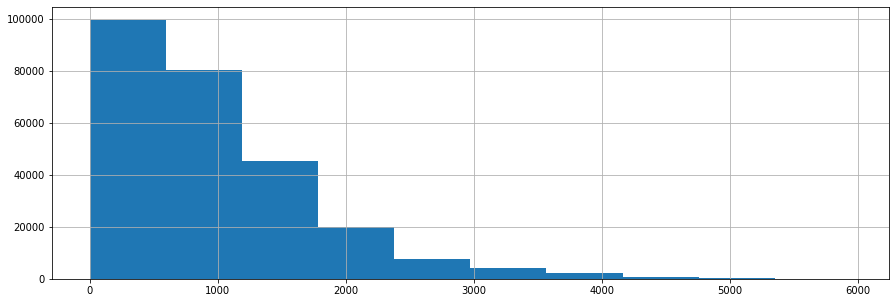

In [ ]:
dfprod['MT'].hist(bins=10,figsize=(15,5))
plt.show()


High level break up of Tasks :

1. Identifying the independent variables and the dependent variables 
2. Start cleaning the data (NaN,missing,inconsistent values/format etc )
3. There are multiple entries for a single coil which has gone throug PLC for the defect fix ,can be aggregated 
4. Try various algorithm with limited no. of records
5. Since its a multiclass classification (SVM,RF(boost) are the obious choices)
6. Neural nets would be the alternative approach






In [ ]:
dfprod.isnull().sum().sort_values(ascending = False).head(50)

Basically, there are 5.3% of the rows from 47 columns (almost half of them) will not contribute towards the prediction can be dropped from the preliminary analysis. Also from the domain knowledge if 0.0 has not allowed for the variable or doesnt contribute towards the prediction ,can be dropped.

In [ ]:
def missing_zero_values_table(df):
        zero_val = (dfprod == 0.00).astype(int).sum(axis=0)
        mis_val = dfprod.isnull().sum()
        mis_val_percent = 100 * dfprod.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Miss Values', 2 : '%of Tot Values'})
        mz_table['Tot Zero&Miss Values'] = mz_table['Zero Values'] + mz_table['Miss Values']
        mz_table['%Tot Zero&Miss Values'] = 100 * mz_table['Tot Zero&Miss Values'] / len(df)
        mz_table['Data Type'] = dfprod.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '%of Tot Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(dfprod.shape[1]) + " columns and " + str(dfprod.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(dfprod)

Your selected dataframe has 109 columns and 260638 Rows.
There are 0 columns that have missing values.


,Zero Values,Miss Values,%of Tot Values,Tot Zero&Miss Values,%Tot Zero&Miss Values,Data Type


In [ ]:
print(dfprod.shape)
print(defect.shape)

(260638, 109)
(617, 10)


In [ ]:
print(dfprod.COIL.unique().shape)
print(defect.COIL.unique().shape)

(1214,)
(534,)


In [ ]:
# This one is the latest
final = pd.merge(dfprod,defect, on=['COIL'],how='outer', suffixes=['_prod', '_defect'],indicator=True,sort=True)
print(final.shape)
print(final.COIL.unique().shape)
final.tail(100)


(276309, 119)
(1229,)


,COIL,DATE_prod,MT,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,TEMP_Z6,PYRO_1_PRECHMBR,PYRO_2_FRST_3_ZONE,PYRO_3_LST_3_ZONE,LS_OVEN,LASER_FRN_1,LASER_FRN_2,LASER_FRN_3,LASER_FRN_4,LASER_FRN_5,LASER_FRN_6,LASER_FRN_7,LASER_FRN_8,LASER_FRN_9,AIR_CH4_1,AIR_CH4_2,AIR_CH4_3,AIR_CH4_4,AIR_CH4_5,AIR_CH4_6,AIR_Z1_1,AIR_Z1_2,AIR_Z2_1,AIR_Z2_2,AIR_Z3_1,AIR_Z3_2,AIR_Z4_1,AIR_Z4_2,AIR_Z5_1,AIR_Z5_2,AIR_Z6_1,AIR_Z6_2,GAS_Z1_1,GAS_Z1_2,GAS_Z2_1,GAS_Z2_2,GAS_Z3_1,GAS_Z3_2,GAS_Z4_1,GAS_Z4_2,GAS_Z5_1,GAS_Z5_2,GAS_Z6_1,GAS_Z6_2,FRN_PHF_PRESSURE,FRN_FURNACE_PRESSURE,TIRO_FORNO,PRES_ZONA1_MEASURED,PRES_ZONA1_SET,PRES_ZONA2_MEASURED,PRES_ZONA2_SET,PRES_ZONA3_MEASURED,PRES_ZONA3_SET,EXT_1,EXT_2,VENT_1,VENT_2,VENT_3,VENT_4,VENT_5,COOL_1A,COOL_1B,COOL_2A,COOL_2B,COOL_3,LS_COOLING,LASER_RAFF_1,LASER_RAFF_2,LASER_RAFF_3,LASER_RAFF_4,LASER_RAFF_5,LASER_RAFF_6,LASER_RAFF_7,LASER_RAFF_8,LASER_RAFF_9,TOUT_RAFF_H2O,N_RAMPE_H2O,ELET_TEMP,ELET_H2SO4,ELET_FE2,ELET_CORRENTE,DEC_TEMP,DEC_H2SO4,DEC_HF,DEC_FE2,DEC_FE3,DEC_FETOT,SPZ2_R1,SPZ2_R2,SPZ2_R3,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG,MT_FROM,MT_TO,DATE_defect,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6,_merge
276209,6838679,2019-04-19,84.0,7.857748,998.431312,1013.680125,1003.348688,1005.583500,1025.253563,1007.128688,668.814188,1031.040563,830.637562,1028.125687,683.645063,1019.165625,1024.148813,1028.428312,1031.793750,1031.050688,1025.206313,1020.175313,724.990500,1.103509,1.174348,-4.696892,1.243131,0.206521,2.803433,643.084875,673.789500,246.238875,438.832125,44.003138,106.555725,382.161375,393.447937,-2.196720,9.620348,45.024638,14.595300,70.832138,70.173281,38.548856,30.609506,-6.284863,2.498344,30.771844,42.962344,1.795455,2.446864,-1.360373,3.873038,0.793356,1.145670,1572.710625,-3.558561,-3.375,-4.347349,-3.375,-2.999475,-3.375,15.819244,29.059762,12.374381,12.374494,12.373875,21.827813,12.374325,475.948688,240.770812,113.779125,51.294825,31.928906,27.150581,23.050125,22.937625,22.880588,27.438750,26.952750,27.060356,26.965519,26.653500,22.801500,46.164881,12.49875,56.375100,107.10,0.0000,2748.127500,69.518925,112.1625,40.950,22.950,48.9375,71.8875,561.710250,530.098875,525.453750,530.421750,16.875000,16.875000,3308.107500,36.866658,479.048062,1691.663906,0.041300,0.258922,0.135029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
276210,6838679,2019-04-19,91.0,7.803028,1003.756500,1016.064563,1006.460437,1008.751500,1028.626313,1009.125000,672.197625,1031.901750,839.871000,1049.487188,688.269375,1039.872938,1046.122875,1050.489562,1053.875250,1052.544938,1044.401063,1040.275125,732.783375,1.075589,1.138044,-4.668784,1.169561,0.189123,1.957258,589.415063,619.559437,297.555750,468.351000,43.968150,106.587281,368.780625,385.251750,-2.334409,9.197994,114.871781,92.631431,66.848625,66.093300,42.667875,36.803419,-6.285836,2.477841,32.392406,43.721325,1.815008,2.468402,8.387454,12.096422,0.964902,1.110514,1571.428125,-3.793101,-3.375,-3.689741,-3.375,-3.011299,-3.375,15.174900,28.818562,12.374044,12.374381,12.374437,21.827813,12.374719,477.428063,240.006937,114.960375,49.561819,30.314250,29.919319,23.017500,22.986394,22.960519,30.529125,29.587500,29.641500,29.381625,29.062519,22.790587,46.163419,12.49875,56.312663,107.10,0.0000,2722.702500,69.571237,112.1625,40.950,22.950,48.9375,71.8875,562.024125,530.254125,528.745500,530.048250,16.875000,16.875000,3308.771250,35.606137,471.444750,1658.154375,0.041331,0.258915,0.135008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
276211,6838679,2019-04-19,98.0,7.849446,1005.234750,1020.461063,1009.579500,1011.687750,1031.440500,1011.531375,665.028000,1039.822875,832.653563,1040.965313,687.436875,1031.995125,1036.114875,1041.108750,1045.650938,1044.179437,1037.772000,1031.964188,730.017000,1.074909,1.153614,-4.768582,1.221373,0.182360,2.079932,603.783563,631.369125,250.707375,440.542125,43.199438,105.875719,368.057250,386.561250,-2.857343,9.276114,191.982937,178.8

In [ ]:
final.loc[final['COIL'].isin(temp['COIL']),'MT'] = temp['MT_TO']

In [ ]:
nulls = final.isnull().sum(0).to_frame()
i=0
for index, row in nulls.iterrows():
  if row[0] > 0:
    print(index, row[0])
    i+=1
print(i) 

In [ ]:
final_bck = final.copy()
#final = final_bck.copy()

In [ ]:
final.isnull().sum().sort_values(ascending=False)

DIF_TIPO_5      158096
DIF_TIPO_4      158096
DIF_TIPO_3      158096
DIF_TIPO_2      158096
DIF_TIPO_1      158096
                 ...  
LASER_RAFF_6        18
LASER_RAFF_7        18
MT                  18
_merge               0
COIL                 0
Length: 119, dtype: int64

In [ ]:
final[final.PRES_ZONA1_SET.isnull()].shape

(18, 119)

In [ ]:
final.drop(columns=['DATE_defect','MT_TO','MT_FROM'],axis=1).isnull().sum().sort_values(ascending=False)

PRES_ZONA1_SET    18
GAS_Z4_1          18
AIR_Z4_2          18
AIR_Z5_1          18
AIR_Z5_2          18
                  ..
DIF_TIPO_2         0
DIF_TIPO_3         0
DIF_TIPO_4         0
DIF_TIPO_5         0
COIL               0
Length: 116, dtype: int64

In [ ]:
print(final.shape)
final.drop(final[final.PRES_ZONA1_SET.isnull()].index, inplace=True)
print(final.shape)
final.isnull().sum().sort_values(ascending=False)

(276309, 119)
(276291, 119)


MT_TO            158096
MT_FROM          158096
DATE_defect      158096
AIR_Z6_2              0
AIR_Z6_1              0
                  ...  
LASER_RAFF_7          0
LASER_RAFF_8          0
LASER_RAFF_9          0
TOUT_RAFF_H2O         0
COIL                  0
Length: 119, dtype: int64

In [ ]:
finalbck2 = final.copy()
#final = finalbck2.copy()

In [ ]:
final.MT_TO.fillna(max(final.MT), inplace=True)
final.MT_FROM.fillna('0.0', inplace=True)
final.DATE_defect.fillna(final.DATE_prod, inplace=True)
final.isnull().sum().sort_values(ascending=False)

_merge           0
GAS_Z2_1         0
AIR_Z2_1         0
AIR_Z2_2         0
AIR_Z3_1         0
                ..
LASER_RAFF_9     0
TOUT_RAFF_H2O    0
N_RAMPE_H2O      0
ELET_TEMP        0
COIL             0
Length: 119, dtype: int64

In [ ]:
final.isnull().sum().sum()

0

In [ ]:
final.drop('_merge',inplace=True,axis=1)
final.to_csv('Final.csv')

In [ ]:
final.isnull().sum().sum()

0

In [ ]:
from google.colab import files

files.download('Final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(final.shape)
final = final[~final.isnull()]
print(final.shape)

(316712, 119)
(316712, 119)


In [ ]:
final[final['_merge']=='left_only'][['DIF_TIPO_1', 'DIF_TIPO_2',
       'DIF_TIPO_3', 'DIF_TIPO_4', 'DIF_TIPO_5', 'DIF_TIPO_6']] 

,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
316707,0,0,0,0,0,0
316708,0,0,0,0,0,0
316709,0,0,0,0,0,0
316710,0,0,0,0,0,0


In [ ]:
final.replace('', np.nan, inplace=True)
final.dropna(inplace=True,axis=0)

In [ ]:
final.isnull().sum().sum()

1486607

In [ ]:
final.tail(100)

,COIL,DATE_prod,MT,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,TEMP_Z6,PYRO_1_PRECHMBR,PYRO_2_FRST_3_ZONE,PYRO_3_LST_3_ZONE,LS_OVEN,LASER_FRN_1,LASER_FRN_2,LASER_FRN_3,LASER_FRN_4,LASER_FRN_5,LASER_FRN_6,LASER_FRN_7,LASER_FRN_8,LASER_FRN_9,AIR_CH4_1,AIR_CH4_2,AIR_CH4_3,AIR_CH4_4,AIR_CH4_5,AIR_CH4_6,AIR_Z1_1,AIR_Z1_2,AIR_Z2_1,AIR_Z2_2,AIR_Z3_1,AIR_Z3_2,AIR_Z4_1,AIR_Z4_2,AIR_Z5_1,AIR_Z5_2,AIR_Z6_1,AIR_Z6_2,GAS_Z1_1,GAS_Z1_2,GAS_Z2_1,GAS_Z2_2,GAS_Z3_1,GAS_Z3_2,GAS_Z4_1,GAS_Z4_2,GAS_Z5_1,GAS_Z5_2,GAS_Z6_1,GAS_Z6_2,FRN_PHF_PRESSURE,FRN_FURNACE_PRESSURE,TIRO_FORNO,PRES_ZONA1_MEASURED,PRES_ZONA1_SET,PRES_ZONA2_MEASURED,PRES_ZONA2_SET,PRES_ZONA3_MEASURED,PRES_ZONA3_SET,EXT_1,EXT_2,VENT_1,VENT_2,VENT_3,VENT_4,VENT_5,COOL_1A,COOL_1B,COOL_2A,COOL_2B,COOL_3,LS_COOLING,LASER_RAFF_1,LASER_RAFF_2,LASER_RAFF_3,LASER_RAFF_4,LASER_RAFF_5,LASER_RAFF_6,LASER_RAFF_7,LASER_RAFF_8,LASER_RAFF_9,TOUT_RAFF_H2O,N_RAMPE_H2O,ELET_TEMP,ELET_H2SO4,ELET_FE2,ELET_CORRENTE,DEC_TEMP,DEC_H2SO4,DEC_HF,DEC_FE2,DEC_FE3,DEC_FETOT,SPZ2_R1,SPZ2_R2,SPZ2_R3,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG,MT_FROM,MT_TO,DATE_defect,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6,_merge
316612,6838679,2019-04-19,182.0,7.830090,1041.337125,1054.396125,1045.387125,1045.129500,1066.244625,1046.320875,664.876125,1072.860750,859.712625,1070.60625,695.536875,1061.093250,1065.974625,1070.742375,1074.274875,1073.458125,1068.582375,1061.317125,740.100375,1.066000,1.117293,-4.587682,1.171418,0.147545,1.712396,764.719875,787.878000,271.595250,453.202875,41.608463,103.559288,436.846500,442.932750,-3.317287,8.610120,194.620500,180.943875,86.330137,85.721063,41.728838,34.897725,-6.286691,2.549486,40.967438,48.843900,1.785173,2.448574,24.512513,26.260538,1.390568,1.826314,1570.71375,-3.397387,-3.375,-4.486939,-3.375,-3.051259,-3.375,13.826363,27.494662,12.373537,12.373875,12.373763,21.827813,12.374888,487.082250,245.928375,117.358875,52.524900,31.139100,37.395450,23.097037,23.133038,23.106037,37.891463,37.070213,37.224788,36.920250,36.734288,22.856962,46.163363,12.49875,56.301638,107.10,0.0000,2705.990625,69.290719,112.1625,40.950,22.950,48.9375,71.8875,561.938063,530.059500,530.426812,530.138813,16.875000,16.875,3309.013125,10.817831,195.969375,1414.39500,0.048715,0.258912,0.134985,NaN,NaN,NaN,0,0,0,0,0,0,left_only
316613,6838679,2019-04-19,189.0,7.815521,1044.462375,1056.938625,1047.078000,1047.794625,1069.120125,1050.187500,658.289250,1074.218625,874.540125,1090.24650,700.711875,1081.077750,1086.049125,1090.797750,1093.557375,1092.749625,1088.082000,1079.664750,746.330625,1.083445,1.106022,-4.606897,1.167221,0.149585,2.884331,777.802500,805.015125,295.381125,463.574250,42.000413,104.970600,430.431750,438.291000,-3.513578,8.845459,121.484250,96.985688,86.601600,85.954500,43.144087,37.889550,-6.284497,2.517019,40.465913,47.412788,1.770694,2.441835,8.164339,12.056850,1.260574,1.680919,1572.68250,-3.298343,-3.375,-3.564371,-3.375,-2.935159,-3.375,13.956525,27.612900,12.374550,12.374100,12.374663,21.827813,12.374663,487.678500,246.251250,117.313875,52.818975,30.796313,37.673212,22.996463,23.090963,23.009963,38.186213,37.298250,37.535287,37.085963,36.787500,22.845038,46.165837,12.49875,56.423306,107.10,0.0000,2714.130000,69.306356,112.1625,40.950,22.950,48.9375,71.8875,561.796313,530.116875,530.508938,530.181000,16.875000,16.875,3309.457500,10.198541,199.990125,1408.56750,0.050818,0.258896,0.134991,NaN,NaN,NaN,0,0,0,0,0,0,left_only
316614,6838679,2019-04-19,196.0,7.865539,1046.287125,1059.651000,1048.523625,1052.894250,1069.454250,1053.258750,658.248750,1076.070375,879.350625,1096.71975,701.922375,1086.212250,1091.446875,1096.803000,1100.539125,1099.674000,1095.133500,1086.645375,748.783125,1.075401,1.126035,-4.638319,1.225868,0.142368,2.084164,802.029375,826.416000,315.877500,472.945500,41.426550,103.710938,344.070000,363.547125,-3.564360,8.635511,158.707125,139.460625,89.745075,89.154112,43.8

In [ ]:
# In case decided to revert to defect based data only
final = pd.merge(defect,dfprod, on=['COIL'],how='inner', suffixes=['_prod', '_defect'],indicator=True,sort=True)
print(final.shape)
print(final.COIL.unique().shape)
final.tail(100)


(132015, 119)
(534,)


,COIL,MT_FROM,MT_TO,DATE_prod,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6,DATE_defect,MT,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,TEMP_Z6,PYRO_1_PRECHMBR,PYRO_2_FRST_3_ZONE,PYRO_3_LST_3_ZONE,LS_OVEN,LASER_FRN_1,LASER_FRN_2,LASER_FRN_3,LASER_FRN_4,LASER_FRN_5,LASER_FRN_6,LASER_FRN_7,LASER_FRN_8,LASER_FRN_9,AIR_CH4_1,AIR_CH4_2,AIR_CH4_3,AIR_CH4_4,AIR_CH4_5,AIR_CH4_6,AIR_Z1_1,AIR_Z1_2,AIR_Z2_1,AIR_Z2_2,AIR_Z3_1,AIR_Z3_2,AIR_Z4_1,AIR_Z4_2,AIR_Z5_1,AIR_Z5_2,AIR_Z6_1,AIR_Z6_2,GAS_Z1_1,GAS_Z1_2,GAS_Z2_1,GAS_Z2_2,GAS_Z3_1,GAS_Z3_2,GAS_Z4_1,GAS_Z4_2,GAS_Z5_1,GAS_Z5_2,GAS_Z6_1,GAS_Z6_2,FRN_PHF_PRESSURE,FRN_FURNACE_PRESSURE,TIRO_FORNO,PRES_ZONA1_MEASURED,PRES_ZONA1_SET,PRES_ZONA2_MEASURED,PRES_ZONA2_SET,PRES_ZONA3_MEASURED,PRES_ZONA3_SET,EXT_1,EXT_2,VENT_1,VENT_2,VENT_3,VENT_4,VENT_5,COOL_1A,COOL_1B,COOL_2A,COOL_2B,COOL_3,LS_COOLING,LASER_RAFF_1,LASER_RAFF_2,LASER_RAFF_3,LASER_RAFF_4,LASER_RAFF_5,LASER_RAFF_6,LASER_RAFF_7,LASER_RAFF_8,LASER_RAFF_9,TOUT_RAFF_H2O,N_RAMPE_H2O,ELET_TEMP,ELET_H2SO4,ELET_FE2,ELET_CORRENTE,DEC_TEMP,DEC_H2SO4,DEC_HF,DEC_FE2,DEC_FE3,DEC_FETOT,SPZ2_R1,SPZ2_R2,SPZ2_R3,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG,_merge
131915,426213,0.0,1408.0,2019-05-15,0,0,1,0,0,1,2019-05-15,1008.0,41.551538,1303.203750,1327.665000,1286.130000,1338.465000,1339.248750,1326.348750,823.708500,1011.159375,1132.016250,1280.265000,728.332875,991.781250,1226.910000,1290.821250,1294.338750,1295.396250,1293.858750,1290.787500,857.379375,1.286048,1.414054,1.583722,1.286239,1.293109,1.267627,1255.181250,1479.701250,3716.381250,3944.073750,4088.651250,4180.631250,1886.711250,2002.995000,1124.555250,1149.393750,1291.552500,1315.593750,126.267750,124.788000,321.121125,318.392250,308.182875,308.197500,178.728750,178.267500,103.910438,103.685737,121.587000,121.233000,-11.101144,1.294714,1710.825000,-3.122235,-3.375,-2.108891,-3.375,-2.652131,-3.375,25.348613,51.167925,19.123875,19.124325,23.246437,47.551275,43.690163,1013.442750,843.766875,731.800125,623.166750,453.948750,281.250000,68.839538,60.956213,73.029038,281.250000,281.250000,281.250000,281.197125,281.250000,250.767000,46.163475,12.49875,56.694488,114.975,15.0750,2729.345625,69.141544,121.8375,39.3750,19.8000,45.3375,65.1375,561.974063,530.168625,530.189437,530.867813,20.232000,19.999463,3550.477500,40.894950,968.599875,3485.733750,0.539768,0.135006,0.162020,both
131916,426213,0.0,1408.0,2019-05-15,0,0,1,0,0,1,2019-05-15,1015.0,41.548888,1303.126250,1327.661250,1286.093750,1338.321250,1338.860000,1326.011250,823.155500,1011.395625,1132.090000,1280.558750,728.013500,992.201875,1226.986250,1291.332500,1294.561250,1295.642500,1294.267500,1290.883750,857.647875,1.288436,1.412463,1.580591,1.284884,1.297091,1.270211,1260.261250,1480.050000,3711.527500,3950.203750,4085.147500,4177.458750,1893.508750,2010.751250,1129.061250,1152.956250,1307.086250,1331.275000,126.255250,124.839875,321.577500,318.772500,308.539375,308.567500,179.652375,179.056000,103.956437,103.745475,122.785500,122.427000,-11.088243,1.283841,1710.015000,-3.152134,-3.375,-2.480364,-3.375,-2.705585,-3.375,25.411000,51.059950,19.124837,19.124675,23.248100,47.528350,43.687362,1013.407750,843.713500,731.837750,623.348750,452.830500,281.250000,73.967563,60.928825,73.009175,281.250000,281.250000,281.250000,281.238250,281.250000,234.718625,46.163475,12.49875,56.698287,114.975,15.0750,2748.118750,69.140675,121.8375,39.3750,19.8000,45.3375,65.1375,561.948500,530.152500,530.581375,530.970500,20.227862,19.936138,3550.458750,40.885612,977.108125,3470.177500,0.538860,0.134990,0.161983,both
131917,426213,0.0,1408.0,2019-05-15,0,0,1,0,0,1,2019-05-15,1022.0,41.548825,1303.148750,1327.745000,1286.223750,1338.251250,1338.542500,1325.857500,823.082750,1011.864000,1132.395000,1281.097500,727.749000,992.427875,1227.641250,1291.975000,1294.905000,1296.088750,1294.857500,1291.113750,857.931875,1.289781,1.408371,1.575521,1.279749,1.288515,1.273300

In [ ]:
#final.drop(columns=['DATE_prod','DATE_defect'],axis=1,inplace=True)
final.drop(columns=['_merge'],axis=1,inplace=True)


In [ ]:
final.shape

(316712, 119)

In [ ]:
final.isnull().sum().sum()

0

In [ ]:
final.to_csv(path+'Final.csv')

In [ ]:
## Merging the two files using COIL field
#By selecting "indicator" parameter we have introduced an additional column which can be dropped before fitting the data to the model
final = pd.merge(dfprod,defect, on=['COIL','DATE'],how='outer', suffixes=['_prod', '_defect'],indicator=True,sort=True)
print(final.shape)
print(final.COIL.unique().shape)
final.head()

(316712, 118)
(1261,)


,COIL,DATE,MT,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,TEMP_Z6,PYRO_1_PRECHMBR,PYRO_2_FRST_3_ZONE,PYRO_3_LST_3_ZONE,LS_OVEN,LASER_FRN_1,LASER_FRN_2,LASER_FRN_3,LASER_FRN_4,LASER_FRN_5,LASER_FRN_6,LASER_FRN_7,LASER_FRN_8,LASER_FRN_9,AIR_CH4_1,AIR_CH4_2,AIR_CH4_3,AIR_CH4_4,AIR_CH4_5,AIR_CH4_6,AIR_Z1_1,AIR_Z1_2,AIR_Z2_1,AIR_Z2_2,AIR_Z3_1,AIR_Z3_2,AIR_Z4_1,AIR_Z4_2,AIR_Z5_1,AIR_Z5_2,AIR_Z6_1,AIR_Z6_2,GAS_Z1_1,GAS_Z1_2,GAS_Z2_1,GAS_Z2_2,GAS_Z3_1,GAS_Z3_2,GAS_Z4_1,GAS_Z4_2,GAS_Z5_1,GAS_Z5_2,GAS_Z6_1,GAS_Z6_2,FRN_PHF_PRESSURE,FRN_FURNACE_PRESSURE,TIRO_FORNO,PRES_ZONA1_MEASURED,PRES_ZONA1_SET,PRES_ZONA2_MEASURED,PRES_ZONA2_SET,PRES_ZONA3_MEASURED,PRES_ZONA3_SET,EXT_1,EXT_2,VENT_1,VENT_2,VENT_3,VENT_4,VENT_5,COOL_1A,COOL_1B,COOL_2A,COOL_2B,COOL_3,LS_COOLING,LASER_RAFF_1,LASER_RAFF_2,LASER_RAFF_3,LASER_RAFF_4,LASER_RAFF_5,LASER_RAFF_6,LASER_RAFF_7,LASER_RAFF_8,LASER_RAFF_9,TOUT_RAFF_H2O,N_RAMPE_H2O,ELET_TEMP,ELET_H2SO4,ELET_FE2,ELET_CORRENTE,DEC_TEMP,DEC_H2SO4,DEC_HF,DEC_FE2,DEC_FE3,DEC_FETOT,SPZ2_R1,SPZ2_R2,SPZ2_R3,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG,MT_FROM,MT_TO,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6,_merge
0,240627,2019-03-15,0.0,16.934625,671.967562,679.751438,688.119187,716.717250,734.616563,734.603062,549.3825,667.890562,548.112375,680.363437,675.189562,677.733187,678.710812,680.512500,681.296625,681.257250,680.042250,677.425500,675.167063,5.412954,-2.463474,-197.742938,0.271786,-0.082831,3.195928,35.145338,295.377750,-59.750888,-33.014306,42.801750,172.177312,33.087825,30.396881,-3.469629,0.231439,26.941669,-0.011718,3.358429,3.852309,6.945739,-2.496392,-6.280712,6.114578,4.744254,22.834238,2.959881,1.654808,-1.963131,2.959054,-0.155080,0.265811,711.841500,-2.387571,-3.375,-3.326377,-3.375,-2.095622,-3.375,18.897244,29.771494,12.374775,12.374156,12.374325,20.5029,12.374325,466.040250,296.154000,183.563438,110.944688,74.410819,94.668638,27.482963,28.003106,30.131606,94.425413,94.524019,95.056537,79.568213,79.544250,31.477163,46.166963,12.49875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,240627,2019-03-15,7.0,16.773638,668.635875,676.207125,681.034500,710.093250,729.040500,727.025625,549.3825,668.464875,548.112375,685.389375,675.187875,680.254875,681.987375,685.770750,687.187125,687.065625,684.934875,679.737375,675.140625,5.702468,-2.587680,-179.533125,0.279100,-0.050294,3.584981,36.641813,295.934625,-59.764950,-35.279438,42.413287,171.421875,33.298875,31.581900,-2.599538,0.641584,27.956250,1.499962,3.202796,3.683002,6.860655,-2.523127,-6.280830,6.225907,4.629274,22.819950,2.955735,1.641015,-1.969537,2.940705,-0.256311,0.083956,489.591000,-2.506792,-3.375,-4.835430,-3.375,-2.201186,-3.375,19.434487,28.253812,12.373875,12.374550,12.374663,20.5029,12.375337,470.616750,299.374875,186.270750,102.729712,57.856837,66.875287,26.618963,27.168750,29.046038,66.229537,66.171037,68.225288,27.687038,25.408462,28.310962,46.166963,12.49875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,240627,2019-03-15,14.0,11.142165,669.105375,677.042625,678.493125,707.967750,727.783500,724.035750,549.3825,667.828500,548.112375,686.797875,675.192375,681.437625,683.927250,687.002625,688.842750,688.174500,686.041500,681.386625,675.134625,5.890249,-2.584238,75.733500,0.273436,-0.001853,3.798979,37.464562,296.771625,-59.747062,-38.886825,42.035400,171.511125,32.032162,31.558612,-1.750928,1.677368,29.319825,2.925375,3.138184,3.562155,6.958714,-2.452084,-6.279859,6.276765,4.634884,22.818113,2.941320,1.672804,-1.971109,2.976086,-0.226870,0.076216,496.532625,-2.835619,-3.375,-3.343840,-3.375,-2.112874,-3.375,19.367747,29.082291,12.374016,12.374016,12.374494,20.5029,12.374663,488.363063,308.761594,190.889156,108.016931,57.902175,66.992681,26.639663,27.178538,28.887019,66.

In [ ]:
dfprod[dfprod['COIL']==367736]

In [ ]:
final[(final['_merge']=='left_only') & (~final['MT_FROM'].isnull())]

,COIL,DATE,MT,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,TEMP_Z6,PYRO_1_PRECHMBR,PYRO_2_FRST_3_ZONE,PYRO_3_LST_3_ZONE,LS_OVEN,LASER_FRN_1,LASER_FRN_2,LASER_FRN_3,LASER_FRN_4,LASER_FRN_5,LASER_FRN_6,LASER_FRN_7,LASER_FRN_8,LASER_FRN_9,AIR_CH4_1,AIR_CH4_2,AIR_CH4_3,AIR_CH4_4,AIR_CH4_5,AIR_CH4_6,AIR_Z1_1,AIR_Z1_2,AIR_Z2_1,AIR_Z2_2,AIR_Z3_1,AIR_Z3_2,AIR_Z4_1,AIR_Z4_2,AIR_Z5_1,AIR_Z5_2,AIR_Z6_1,AIR_Z6_2,GAS_Z1_1,GAS_Z1_2,GAS_Z2_1,GAS_Z2_2,GAS_Z3_1,GAS_Z3_2,GAS_Z4_1,GAS_Z4_2,GAS_Z5_1,GAS_Z5_2,GAS_Z6_1,GAS_Z6_2,FRN_PHF_PRESSURE,FRN_FURNACE_PRESSURE,TIRO_FORNO,PRES_ZONA1_MEASURED,PRES_ZONA1_SET,PRES_ZONA2_MEASURED,PRES_ZONA2_SET,PRES_ZONA3_MEASURED,PRES_ZONA3_SET,EXT_1,EXT_2,VENT_1,VENT_2,VENT_3,VENT_4,VENT_5,COOL_1A,COOL_1B,COOL_2A,COOL_2B,COOL_3,LS_COOLING,LASER_RAFF_1,LASER_RAFF_2,LASER_RAFF_3,LASER_RAFF_4,LASER_RAFF_5,LASER_RAFF_6,LASER_RAFF_7,LASER_RAFF_8,LASER_RAFF_9,TOUT_RAFF_H2O,N_RAMPE_H2O,ELET_TEMP,ELET_H2SO4,ELET_FE2,ELET_CORRENTE,DEC_TEMP,DEC_H2SO4,DEC_HF,DEC_FE2,DEC_FE3,DEC_FETOT,SPZ2_R1,SPZ2_R2,SPZ2_R3,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG,MT_FROM,MT_TO,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6,_merge


In [ ]:
final[final['_merge']=='both']

,COIL,DATE,MT,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,TEMP_Z6,PYRO_1_PRECHMBR,PYRO_2_FRST_3_ZONE,PYRO_3_LST_3_ZONE,LS_OVEN,LASER_FRN_1,LASER_FRN_2,LASER_FRN_3,LASER_FRN_4,LASER_FRN_5,LASER_FRN_6,LASER_FRN_7,LASER_FRN_8,LASER_FRN_9,AIR_CH4_1,AIR_CH4_2,AIR_CH4_3,AIR_CH4_4,AIR_CH4_5,AIR_CH4_6,AIR_Z1_1,AIR_Z1_2,AIR_Z2_1,AIR_Z2_2,AIR_Z3_1,AIR_Z3_2,AIR_Z4_1,AIR_Z4_2,AIR_Z5_1,AIR_Z5_2,AIR_Z6_1,AIR_Z6_2,GAS_Z1_1,GAS_Z1_2,GAS_Z2_1,GAS_Z2_2,GAS_Z3_1,GAS_Z3_2,GAS_Z4_1,GAS_Z4_2,GAS_Z5_1,GAS_Z5_2,GAS_Z6_1,GAS_Z6_2,FRN_PHF_PRESSURE,FRN_FURNACE_PRESSURE,TIRO_FORNO,PRES_ZONA1_MEASURED,PRES_ZONA1_SET,PRES_ZONA2_MEASURED,PRES_ZONA2_SET,PRES_ZONA3_MEASURED,PRES_ZONA3_SET,EXT_1,EXT_2,VENT_1,VENT_2,VENT_3,VENT_4,VENT_5,COOL_1A,COOL_1B,COOL_2A,COOL_2B,COOL_3,LS_COOLING,LASER_RAFF_1,LASER_RAFF_2,LASER_RAFF_3,LASER_RAFF_4,LASER_RAFF_5,LASER_RAFF_6,LASER_RAFF_7,LASER_RAFF_8,LASER_RAFF_9,TOUT_RAFF_H2O,N_RAMPE_H2O,ELET_TEMP,ELET_H2SO4,ELET_FE2,ELET_CORRENTE,DEC_TEMP,DEC_H2SO4,DEC_HF,DEC_FE2,DEC_FE3,DEC_FETOT,SPZ2_R1,SPZ2_R2,SPZ2_R3,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG,MT_FROM,MT_TO,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6,_merge
4366,367736,2019-04-14,0.0,23.566950,1253.677500,1281.431250,1288.552500,1305.427500,1322.392500,1286.527500,813.421125,1128.712500,1065.416625,1249.503750,1122.989625,1243.755000,1245.802500,1248.480000,1251.562500,1252.102500,1249.593750,1246.938750,1059.460875,1.290127,1.358696,1.342564,1.388081,1.380341,1.374277,2063.790000,2204.302500,2397.847500,2635.323750,2880.348750,2937.735000,1692.540000,1800.911250,1088.014500,1112.202000,1046.356875,1068.126750,195.927750,194.610375,219.848625,217.446750,255.102750,256.466250,148.008375,149.091750,94.205587,93.959663,90.922050,90.708975,-6.093394,3.132697,2698.818750,-2.988833,-3.375,-2.648228,-3.375,-2.730892,-3.375,11.636325,42.592838,15.045188,14.624888,19.056938,39.226050,31.499325,953.754750,782.866125,675.725625,566.308125,394.026750,281.192625,182.040750,55.067963,65.125462,281.25,281.077875,281.25,281.250000,281.250000,281.197125,46.166850,12.49875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,719.0,0,0,1,0,0,0,both
4367,367736,2019-04-14,7.0,23.565262,1253.981250,1281.363750,1289.767500,1305.686250,1322.820000,1287.180000,790.511625,1128.633750,1060.917750,1248.907500,826.961625,1243.563750,1245.521250,1247.726250,1250.482500,1251.225000,1249.593750,1246.770000,1059.638625,1.297226,1.348414,1.344161,1.402549,1.366166,1.362488,2071.147500,2208.476250,2395.732500,2623.286250,2862.708750,2924.347500,1692.573750,1798.008750,1089.010125,1112.658750,1048.756500,1069.512750,195.270750,194.203125,220.836375,218.559375,253.435500,254.823750,146.254500,147.539250,95.249137,94.999163,91.860637,91.676362,-6.265046,2.943900,2698.335000,-3.230854,-3.375,-3.707539,-3.375,-2.425331,-3.375,11.689200,41.753813,14.637825,13.498763,19.125338,39.791587,31.687537,959.890500,790.872750,670.492125,557.136000,395.281125,281.250000,123.364125,59.500462,71.049037,281.25,281.250000,281.25,281.194875,281.250000,281.250000,48.762675,12.49875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.655629,1312.674750,4620.799125,0.421000,0.134611,0.242885,0.0,719.0,0,0,1,0,0,0,both
4368,367736,2019-04-14,14.0,23.570363,1254.041250,1281.416250,1289.902500,1305.390000,1322.370000,1287.033750,787.682250,1136.178750,1063.686375,1247.246250,793.646625,1240.751250,1243.612500,1245.881250,1248.960000,1249.680000,1248.097500,1245.311250,1059.350625,1.291534,1.352741,1.346415,1.417541,1.444568,1.406152,2048.137500,2185.083750,2387.118750,2617.293750,2814.165000,2879.137500,1700.932500,1798.627500,1048.717125,1073.017875,1053.800625,1074.878250,194.002125,192.949500,219.572625,217.148625,248.874750,250.340625,145.125750,146.312625,87.070238,86.847375,89.444100,89.273475,-6.312645,2.986871,2698.721250,-3.

In [ ]:
final[final['COIL']==6838679]

,COIL,DATE_prod,MT,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,TEMP_Z6,PYRO_1_PRECHMBR,PYRO_2_FRST_3_ZONE,PYRO_3_LST_3_ZONE,LS_OVEN,LASER_FRN_1,LASER_FRN_2,LASER_FRN_3,LASER_FRN_4,LASER_FRN_5,LASER_FRN_6,LASER_FRN_7,LASER_FRN_8,LASER_FRN_9,AIR_CH4_1,AIR_CH4_2,AIR_CH4_3,AIR_CH4_4,AIR_CH4_5,AIR_CH4_6,AIR_Z1_1,AIR_Z1_2,AIR_Z2_1,AIR_Z2_2,AIR_Z3_1,AIR_Z3_2,AIR_Z4_1,AIR_Z4_2,AIR_Z5_1,AIR_Z5_2,AIR_Z6_1,AIR_Z6_2,GAS_Z1_1,GAS_Z1_2,GAS_Z2_1,GAS_Z2_2,GAS_Z3_1,GAS_Z3_2,GAS_Z4_1,GAS_Z4_2,GAS_Z5_1,GAS_Z5_2,GAS_Z6_1,GAS_Z6_2,FRN_PHF_PRESSURE,FRN_FURNACE_PRESSURE,TIRO_FORNO,PRES_ZONA1_MEASURED,PRES_ZONA1_SET,PRES_ZONA2_MEASURED,PRES_ZONA2_SET,PRES_ZONA3_MEASURED,PRES_ZONA3_SET,EXT_1,EXT_2,VENT_1,VENT_2,VENT_3,VENT_4,VENT_5,COOL_1A,COOL_1B,COOL_2A,COOL_2B,COOL_3,LS_COOLING,LASER_RAFF_1,LASER_RAFF_2,LASER_RAFF_3,LASER_RAFF_4,LASER_RAFF_5,LASER_RAFF_6,LASER_RAFF_7,LASER_RAFF_8,LASER_RAFF_9,TOUT_RAFF_H2O,N_RAMPE_H2O,ELET_TEMP,ELET_H2SO4,ELET_FE2,ELET_CORRENTE,DEC_TEMP,DEC_H2SO4,DEC_HF,DEC_FE2,DEC_FE3,DEC_FETOT,SPZ2_R1,SPZ2_R2,SPZ2_R3,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG,MT_FROM,MT_TO,DATE_defect,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6,_merge
276201,6838679,2019-04-19,28.0,16.815037,987.933375,1000.800000,991.208250,983.427750,1000.441125,985.833000,578.639250,1010.346750,843.118875,963.640125,952.846875,964.830375,964.207125,963.626625,963.898875,963.000000,963.468000,963.397125,832.386375,1.081318,1.129151,-4.873196,1.258132,0.953782,1.334396,945.120375,970.697250,703.436625,802.329750,44.858137,107.604338,547.630875,559.140750,129.537000,134.023500,211.297500,200.810250,105.084787,104.437350,79.910213,77.646825,-6.285712,2.590999,49.188375,54.650813,16.206863,16.419150,17.270775,19.212187,2.411798,2.262937,1573.931250,-3.118607,-3.375,-4.110345,-3.375,-2.936295,-3.375,15.228787,27.707006,12.374437,12.374381,12.373875,21.827813,12.374044,471.077437,237.553313,111.087225,53.086388,31.571381,37.900463,23.066944,22.903875,22.854713,38.530519,37.616625,37.554356,37.134394,36.851231,26.014106,46.165500,12.49875,56.455762,107.10,0.0000,3277.28250,69.777450,112.1625,40.950,22.950,48.9375,71.8875,562.120875,530.004375,527.337000,529.839000,18.050963,18.000000,3308.017500,36.861413,483.642000,1704.330000,0.039562,0.258955,0.134933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
276202,6838679,2019-04-19,35.0,16.825331,987.291844,1001.698031,989.775844,987.813562,1003.434187,985.436156,588.178969,1011.636000,831.958031,955.580625,945.131906,957.404531,955.795500,956.371781,957.171938,954.699187,953.865563,956.862000,745.696406,1.087349,1.144590,-0.523313,1.203303,0.282901,1.324046,1016.392219,1046.889563,741.303844,827.851219,225.930628,284.524594,472.973625,482.724562,18.037848,29.224794,212.806125,202.488188,112.472128,111.784978,82.036631,79.871456,17.361638,31.938916,43.772231,49.998994,4.250618,4.791189,17.567016,19.468491,2.790970,2.925728,1573.489687,-3.287526,-3.375,-3.274369,-3.375,-2.927925,-3.375,15.244481,28.173769,12.374831,12.374550,12.374775,21.827813,12.374663,471.445875,237.738375,113.581688,50.393812,32.972906,37.438256,23.005856,22.898981,22.845713,38.013019,37.038375,37.263375,36.788287,36.260606,24.421106,46.163588,12.49875,56.598975,107.10,0.0000,3241.63125,69.565163,112.1625,40.950,22.950,48.9375,71.8875,562.377375,530.219250,531.401625,530.082000,18.076500,18.000000,3309.648750,36.863184,478.333266,1698.620625,0.040746,0.259025,0.134951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
276203,6838679,2019-04-19,42.0,16.878572,989.282250,1004.420250,992.810250,993.772969,1004.960813,987.669281,598.865062,1041.393094,865.659938,1042.651969,707.347688,1038.646406,1040.265281,1042.720594,1044.912375,1043.841375,1041.521344,1038.549937,732.955781,1.080640,1.139212,-2.468222,1.090732,0.169298,1.113408,1035.755156,1063.631813,708.782906,802.171688,176.418000,235.368281,326.596500,349.321781,-3.182290,9.303457,210.913875,200.55600

In [ ]:
final2 = pd.merge(dfprod,defect, on=['COIL'],how='outer', suffixes=['_prod', '_defect'],indicator=True,sort=True)
print(final2.shape)
final2.head()

In [ ]:
final2[(final2['_merge']=='left_only') & (final2['MT_FROM'].isnull())]

In [ ]:
# From below result its evident that there are around 9000 COIL entries for which dates are not matching
final2[final2['_merge']=='both']

In [ ]:
# Change it to inner/outer 
final3 = pd.merge(defect,dfprod, on=['COIL'],how='outer', suffixes=['_defect', '_prod'],indicator=True,sort=True)
print(final3.shape)
final3.tail(100)

In [ ]:
t = final3[final3['DATE_defect']!=final3['DATE_prod']]['COIL']
t.value_counts()

410423    294
414332    294
414719    248
Name: COIL, dtype: int64

In [ ]:
col_list2=['DIF_TIPO_1','DIF_TIPO_2','DIF_TIPO_3','DIF_TIPO_4','DIF_TIPO_5','DIF_TIPO_6']
result = final2[final2['_merge']=='both'][col_list2]


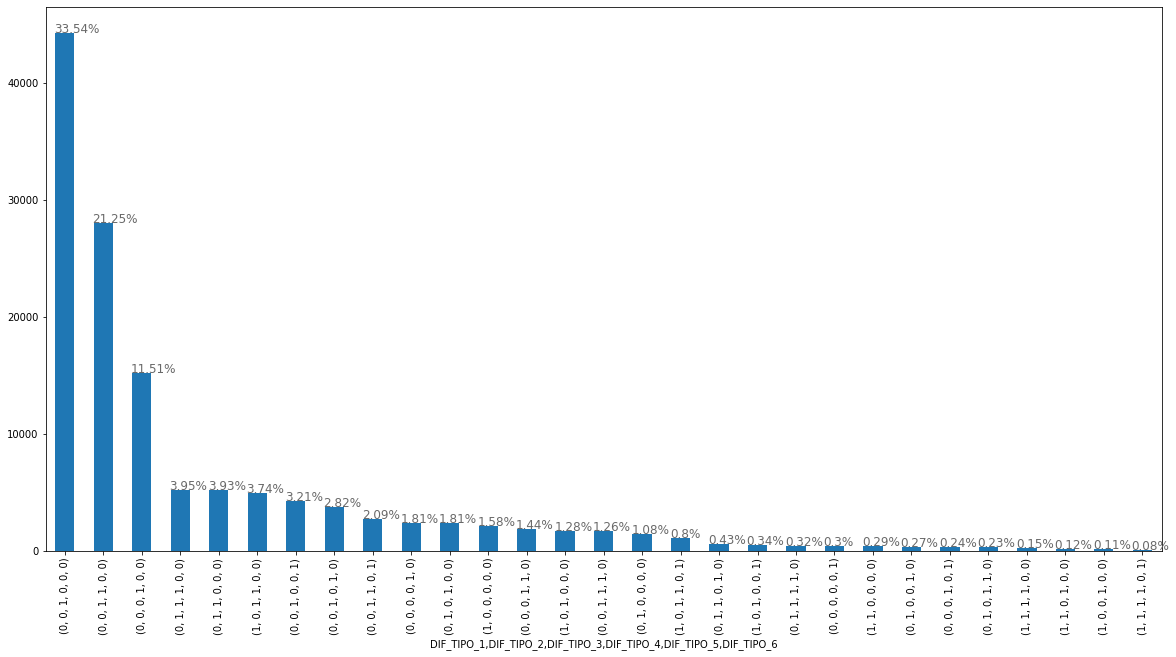

In [ ]:
# Change this line to plot percentages instead of absolute values
ax = result.value_counts().plot(kind='bar',figsize=(20,10))
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=12,
                color='dimgrey')
 

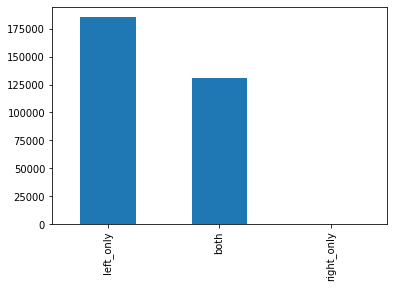

In [ ]:
final['_merge'].value_counts().plot(kind='bar')

In [ ]:
final2[final2.apply(lambda x: x['DATE_prod'] != x['DATE_defect'], axis = 1)]

In [ ]:
labels = ['DIF_TIPO_1','DIF_TIPO_2','DIF_TIPO_3','DIF_TIPO_4','DIF_TIPO_5','DIF_TIPO_6']
labels_df = final[labels]
label_d = {'DIF_TIPO_1' : 0, 'DIF_TIPO_2': 0, 'DIF_TIPO_3' : 0, 'DIF_TIPO_4' : 0, 'DIF_TIPO_5': 0, 'DIF_TIPO_6' : 0}
for col in labels_df.columns:
    label_d[col] += len(labels_df[labels_df[col] == 1])

plt.figure(figsize = (16,8))
plt.bar(range(len(label_d)), list(label_d.values()), align='center')
plt.xticks(range(len(label_d)), list(label_d.keys()))
plt.show()

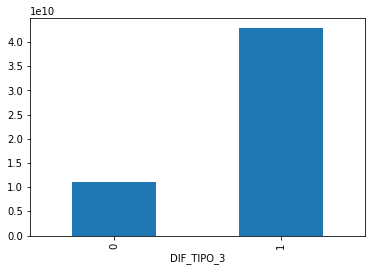

In [ ]:
final2.groupby('DIF_TIPO_3').sum()['COIL'].plot(kind='bar')

In [ ]:
### It can be oberved that the Zero count has increased for the columns after Replace operation .
def missing_zero_values_table(df):
        mis_val = final.isnull().sum()
        mis_val_percent = 100 * final.isnull().sum() / len(final)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Miss Values', 1 : '%of Tot Values'})
        mz_table['Data Type'] = final.dtypes
        mz_table = mz_table[mz_table.iloc[:,1] != 0].sort_values('%of Tot Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(final.shape[1]) + " columns and " + str(final.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(final)

Your selected dataframe has 118 columns and 316712 Rows.
There are 55 columns that have missing values.


,Miss Values,%of Tot Values,Data Type
DIF_TIPO_6,185533,58.6,object
DIF_TIPO_2,185533,58.6,object
MT_TO,185533,58.6,float64
DIF_TIPO_1,185533,58.6,object
MT_FROM,185533,58.6,float64
DIF_TIPO_3,185533,58.6,object
DIF_TIPO_4,185533,58.6,object
DIF_TIPO_5,185533,58.6,object
DEC_FE3,16120,5.1,float64
ELET_TEMP,16120,5.1,float64


## From above numbers its is clear that Date has no role to play in further analysis and can be dropped 
1. Find out the relationship between MT,MT_FROM,MT_TO feild on the COILs which defect data is available
2.set a partitions for the meters and check for the count of defects category for each range.This will give a clear picture for COIL and MT 
3. Above two steps can be done with limited number of records
4. There are COILs for which defects are present for some instance and not for the others  .Need to find out the settings for Noentry
coilid_prod coilid_defect defect_type
1            1              1
1            1              2
1            1              No entry

In [ ]:
## Dropping NA/segregating  are the two approaches for the columns where COIL ID is not matching 


In [ ]:
# Not an ideal way to drop the row for the columns which has 'NAN' value and is insignificant in prediction ,So feature selection is must

dfprod.dropna(how='any',inplace=True)
df0.shape

(277129, 110)

FRom correlation heatmap its clear that the series of vars with "name+1/2/3.."  are highly correlated to one another and can go through dimensionality reduction

In [ ]:
cor_matrix = df0.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
df1 = df0.drop(df0.columns[[to_drop]], axis=1)
df1.tail(100)    


In [ ]:
a = pd.DataFrame({'COIL':['99', '1', '1','1','1','7','7','7'],
                  'MT':['7', '7', '14','21','28','7','14','21'], 
                  'S':['s1', 's2', 's3', 's4','s5', 's6', 's7', 's8']})

b = pd.DataFrame({'COIL':['1', '1', '7','7'],
                  'MT_F':['1', '16', '1','11'],
                  'MT_T':['15', '28', '10','20'],
                  'D':['d1', 'd2', 'd4', 'd5']})

result = pd.merge(a, b, on=['COIL'], how='inner', suffixes=['_A', '_B'],indicator=True,sort=True)
result

,COIL,MT,S,MT_F,MT_T,D,_merge
0,1,7,s2,1,15,d1,both
1,1,7,s2,16,28,d2,both
2,1,14,s3,1,15,d1,both
3,1,14,s3,16,28,d2,both
4,1,21,s4,1,15,d1,both
5,1,21,s4,16,28,d2,both
6,1,28,s5,1,15,d1,both
7,1,28,s5,16,28,d2,both
8,7,7,s6,1,10,d4,both
9,7,7,s6,11,20,d5,both


In [ ]:
result.dropna(axis=0,inplace=True)

In [ ]:
col = ['COIL','MT','MT_F','MT_T']

for i in col:
  result[i] = result[i].astype('int64',errors='ignore') 
  print(result[i].dtype)

int64
int64
int64
int64


In [ ]:
temp = result.loc[(result['MT']<=result['MT_T']) & (result['MT']>=result['MT_F']),col]
temp2= result.loc[~((result['MT']<=result['MT_T']) & (result['MT']>=result['MT_F'])),col]
temp['ind'] = 'yes'
temp2['ind'] = 'no'
display(temp,temp2)

,COIL,MT,MT_F,MT_T,ind
0,1,7,1,15,yes
2,1,14,1,15,yes
5,1,21,16,28,yes
7,1,28,16,28,yes
8,7,7,1,10,yes
11,7,14,11,20,yes


,COIL,MT,MT_F,MT_T,ind
1,1,7,16,28,no
3,1,14,16,28,no
4,1,21,1,15,no
6,1,28,1,15,no
9,7,7,11,20,no
10,7,14,1,10,no
12,7,21,1,10,no
13,7,21,11,20,no


In [ ]:
for i in a['A'].values:
  if i in b['A']: 
    r = range(int(b['C']),int(b['v'])+1)
    if a['A'] in r:
      a['indicator']='Group1'
  else:
    a['indicator'] = np.nan
    
print(val1,val2)

TypeError: ignored